In [ ]:
# Case Study

Steps involved:
- Import the Data
- Understand the Data
- Clean the Data
- Identify the relationships
- Visulaize the Data
- Handle outliers
- Summary

In [ ]:
## Importing useful Libraries
import numpy as np
import pandas as pd


## Data Visulaization Library
import matplotlib.pyplot as plt
import seaborn as sns

## Ignore Warnings
import warnings`
warnings.filterwarnings('ignore')


In [1]:
#Read the data file
loan_data=pd.read_csv("E:\\loan.csv")

In [2]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#understanding number of elements across axis
loan_data.shape

(39717, 111)

In [4]:
#Fetching basic info about data

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Fetching info about dtypes of each column
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning

In [6]:

loan_data.duplicated(subset=None, keep= 'first').count()
duplicate=loan_data[loan_data.duplicated(['id'])]
duplicate

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [7]:
#  Finding missing values from rows & Columns:
print('# of empty Rows')
print(loan_data.isnull().all(axis=1).sum())

print('# of empty Columns')
print(loan_data.isnull().all(axis=0).sum())

#Identifcation of null values
loan_data.isnull().sum()

# of empty Rows
0
# of empty Columns
54


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#Null Values in percentages
Null_Values=round(100*(loan_data.isnull().sum())/len(loan_data.index),2)
Null_Values

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### Removal of null values

In [9]:
##Dropping values greater than 40
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<40]
loan_data.shape

(39717, 54)

In [10]:
# Checking column with large amount of null values percentages
(loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False)

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [11]:
# Columns in the dataframe
loan_data.shape

(39717, 54)

In [12]:
#unique Values
loan_data.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
pymnt_plan                    1
term                          2
dtype: int64

### Dropping coulmns

In [13]:
#Unique Values
loan_data=loan_data.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','initial_list_status','collections_12_mths_ex_med','pymnt_plan'],axis=1)
print(loan_data)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... total_pymnt_inv  \
0       36 months   10.65%       162.87     B        B2  ...         5833.84   

In [14]:
#rechecking columns
loan_data.shape


(39717, 45)

In [15]:
#rechecking columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### Dropping more not so significant columns

In [16]:
loan_data.shape


(39717, 45)

In [17]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
loan_data.drop_duplicates()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [19]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
loan_data.duplicated(subset=None, keep= 'first').count()
duplicate=loan_data[loan_data.duplicated(['id'])]
duplicate


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [21]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [22]:
loan_data=loan_data.drop(['total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee'],axis=1)
print(loan_data)


            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... total_acc  \
0       36 months   10.65%       162.87     B        B2  ...         9   
1       60 

In [23]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
#removing even more columns which are not required for the case study which focus on anaysing of defaulting factors before
loan_data=loan_data.drop(['member_id','url', 'desc','emp_title','zip_code','recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',],axis=1)
print(loan_data)

            id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501       5000         5000           4975.0   36 months   10.65%   
1      1077430       2500         2500           2500.0   60 months   15.27%   
2      1077175       2400         2400           2400.0   36 months   15.96%   
3      1076863      10000        10000          10000.0   36 months   13.49%   
4      1075358       3000         3000           3000.0   60 months   12.69%   
...        ...        ...          ...              ...         ...      ...   
39712    92187       2500         2500           1075.0   36 months    8.07%   
39713    90665       8500         8500            875.0   36 months   10.28%   
39714    90395       5000         5000           1325.0   36 months    8.07%   
39715    90376       5000         5000            650.0   36 months    7.43%   
39716    87023       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade emp_

In [25]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [26]:
loan_data=loan_data.drop(['funded_amnt_inv','title','out_prncp', 'out_prncp_inv','total_pymnt', 'last_credit_pull_d','earliest_cr_line','inq_last_6mths','delinq_2yrs','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc'],axis=1)
print(loan_data)

            id  loan_amnt  funded_amnt        term int_rate  installment  \
0      1077501       5000         5000   36 months   10.65%       162.87   
1      1077430       2500         2500   60 months   15.27%        59.83   
2      1077175       2400         2400   36 months   15.96%        84.33   
3      1076863      10000        10000   36 months   13.49%       339.31   
4      1075358       3000         3000   60 months   12.69%        67.79   
...        ...        ...          ...         ...      ...          ...   
39712    92187       2500         2500   36 months    8.07%        78.42   
39713    90665       8500         8500   36 months   10.28%       275.38   
39714    90395       5000         5000   36 months    8.07%       156.84   
39715    90376       5000         5000   36 months    7.43%       155.38   
39716    87023       7500         7500   36 months   13.75%       255.43   

      grade sub_grade emp_length home_ownership  annual_inc  \
0         B        B2  1

In [27]:
loan_data.shape

(39717, 18)

In [28]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

### Rechecking and fixing the null values

In [29]:
loan_data.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64

In [30]:
#Check the values in emp_length and pub_rec_bankruptcies to fix the values
print(loan_data.emp_length.value_counts())
loan_data.pub_rec_bankruptcies.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
#using dropna to remove null values
loan_data = loan_data.dropna(subset=['emp_length','pub_rec_bankruptcies'], inplace=False)
loan_data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800,4800,36 months,10.28%,155.52,C,C1,1 year,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,VA,7.51,1.0
39573,150940,7000,7000,36 months,10.59%,227.82,C,C2,3 years,MORTGAGE,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,AZ,8.50,1.0
39623,132892,9000,9000,36 months,12.49%,301.04,D,D3,8 years,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,MD,5.08,1.0
39666,119043,15450,15450,36 months,11.22%,507.46,C,C4,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,VA,13.50,1.0


In [32]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [33]:
#Missing values
loan_data.isnull().sum()


id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [34]:
#Removing current from loan status:Charged off and Fully paid
loan_data=loan_data[loan_data.loan_status !='Current']
loan_data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800,4800,36 months,10.28%,155.52,C,C1,1 year,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,VA,7.51,1.0
39573,150940,7000,7000,36 months,10.59%,227.82,C,C2,3 years,MORTGAGE,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,AZ,8.50,1.0
39623,132892,9000,9000,36 months,12.49%,301.04,D,D3,8 years,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,MD,5.08,1.0
39666,119043,15450,15450,36 months,11.22%,507.46,C,C4,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,VA,13.50,1.0


In [35]:
#Removing empty space from all columns with string values
print(loan_data['term'].str.strip())
print(loan_data['emp_length'].str.strip())
print(loan_data['home_ownership'].str.strip())
print(loan_data['verification_status'].str.strip())
print(loan_data['loan_status'].str.strip())
print(loan_data['purpose'].str.strip())
print(loan_data['addr_state'].str.strip())

0        36 months
1        60 months
2        36 months
3        36 months
5        36 months
           ...    
39562    36 months
39573    36 months
39623    36 months
39666    36 months
39680    36 months
Name: term, Length: 36847, dtype: object
0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 36847, dtype: object
0            RENT
1            RENT
2            RENT
3            RENT
5            RENT
           ...   
39562        RENT
39573    MORTGAGE
39623    MORTGAGE
39666    MORTGAGE
39680    MORTGAGE
Name: home_ownership, Length: 36847, dtype: object
0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
5        Source Verified
              ...       
39562       Not Verified
39573       Not Verified
39623       Not Verified
39666       Not Veri

In [36]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [37]:
print(loan_data.describe())
print(loan_data.info())

                 id     loan_amnt   funded_amnt   installment    annual_inc  \
count  3.684700e+04  36847.000000  36847.000000  36847.000000  3.684700e+04   
mean   6.831532e+05  11141.327652  10872.924526    324.694599  6.940448e+04   
std    2.014598e+05   7369.988994   7109.330771    208.886154  6.402747e+04   
min    5.473400e+04    500.000000    500.000000     16.080000  4.000000e+03   
25%    5.170210e+05   5500.000000   5400.000000    167.565000  4.100400e+04   
50%    6.596910e+05  10000.000000   9600.000000    280.000000  6.000000e+04   
75%    8.309685e+05  15000.000000  15000.000000    428.975000  8.300000e+04   
max    1.077501e+06  35000.000000  35000.000000   1305.190000  6.000000e+06   

                dti  pub_rec_bankruptcies  
count  36847.000000          36847.000000  
mean      13.330449              0.041794  
std        6.651565              0.200799  
min        0.000000              0.000000  
25%        8.210000              0.000000  
50%       13.420000     

In [38]:
loan_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [39]:
loan_data

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,154154,4800,4800,36 months,10.28%,155.52,C,C1,1 year,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,VA,7.51,1.0
39573,150940,7000,7000,36 months,10.59%,227.82,C,C2,3 years,MORTGAGE,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,AZ,8.50,1.0
39623,132892,9000,9000,36 months,12.49%,301.04,D,D3,8 years,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,MD,5.08,1.0
39666,119043,15450,15450,36 months,11.22%,507.46,C,C4,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,VA,13.50,1.0


## Data type conversion


In [40]:
loan_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [41]:

loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [42]:
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [43]:

number_of_rows = len(loan_data)
number_of_rows, number_of_columns = loan_data.shape
loan_data.info()
print("Number of rows:",number_of_rows)
print("Number_of_columns:",number_of_columns)
print(loan_data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36847 non-null  int64  
 1   loan_amnt             36847 non-null  int64  
 2   funded_amnt           36847 non-null  int64  
 3   term                  36847 non-null  object 
 4   int_rate              36847 non-null  float64
 5   installment           36847 non-null  float64
 6   grade                 36847 non-null  object 
 7   sub_grade             36847 non-null  object 
 8   emp_length            36847 non-null  int64  
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  addr_state         

## Univariate Analysis- Handling outliers


In [44]:
loan_data['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

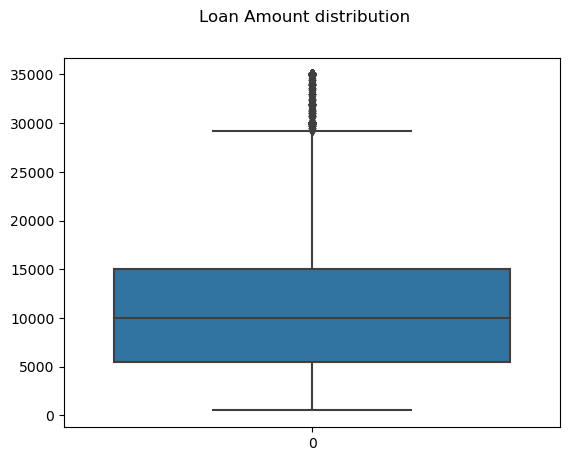

In [45]:
#Using boxplot
sns.boxplot(loan_data.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

In [46]:
#Stats of loan amount
loan_data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Observation for loan_amount

Most of the loans taken are < 10000 follwed by 10k-15k follwed by >15k till 36k


#### Annual Income

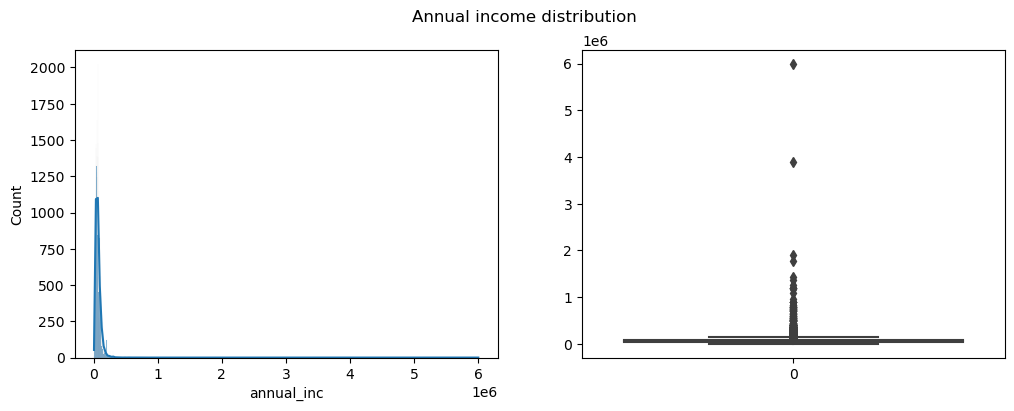

In [47]:
#Data after removing outliers using quantile
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(loan_data["annual_inc"],kde=True)
plt.subplot(1,2,2)
sns.boxplot(loan_data['annual_inc'])
plt.suptitle('Annual income distribution')
plt.show()




### Observation:
Most of the people opting for loan has low annual income  

In [48]:
## Removing outliers in annual_inc greater than 99th percentile
import numpy as np
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

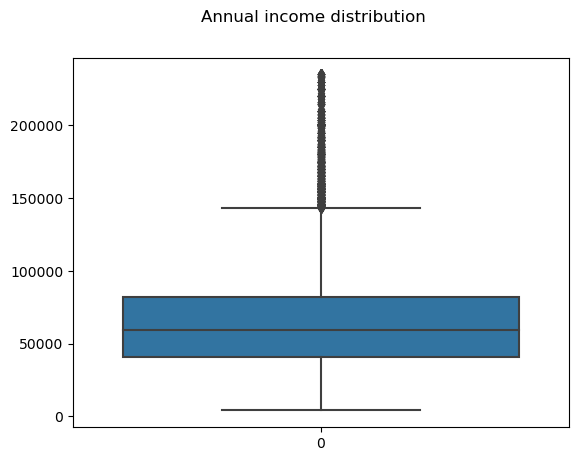

In [49]:
sns.boxplot(loan_data['annual_inc'])
plt.suptitle('Annual income distribution')
plt.show()

### DTI

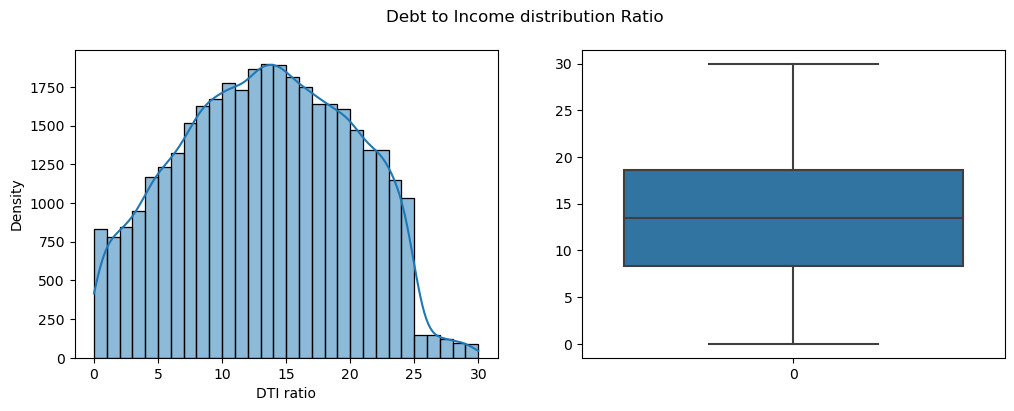

In [50]:
#Using Subplots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(loan_data['dti'], kde=True, bins=30)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
#Subplot 2
plt.subplot(1,2,2)
sns.boxplot(loan_data.dti)
plt.suptitle('Debt to Income distribution Ratio')
plt.show()

Observation : Majority of the loan takers has high DTI Ratio

### pub_rec_bankruptcies


count    36485.000000
mean         0.042099
std          0.201500
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


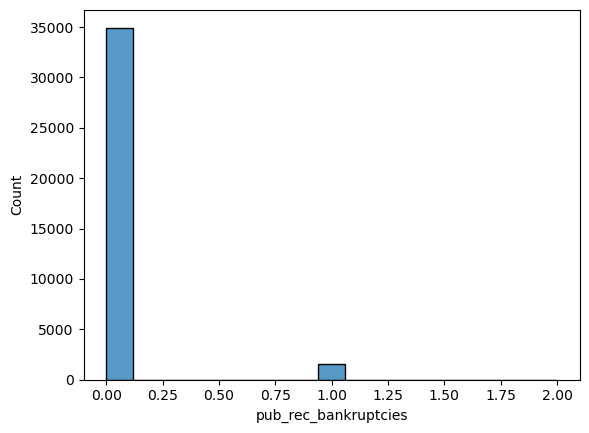

In [51]:
sns.histplot(loan_data['pub_rec_bankruptcies'], kde=False)
print(loan_data.pub_rec_bankruptcies.describe())

#### Loan Status

<Axes: xlabel='loan_status', ylabel='count'>

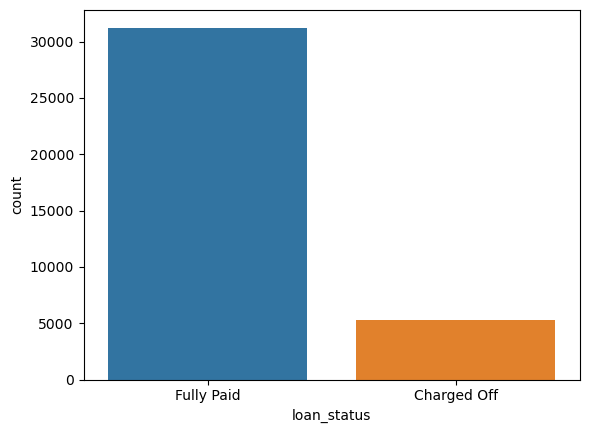

In [52]:
sns.countplot(x = 'loan_status', data = loan_data)

Value of Charged off loans is less compared to Fully Paid loans

##### Info about Loan Term

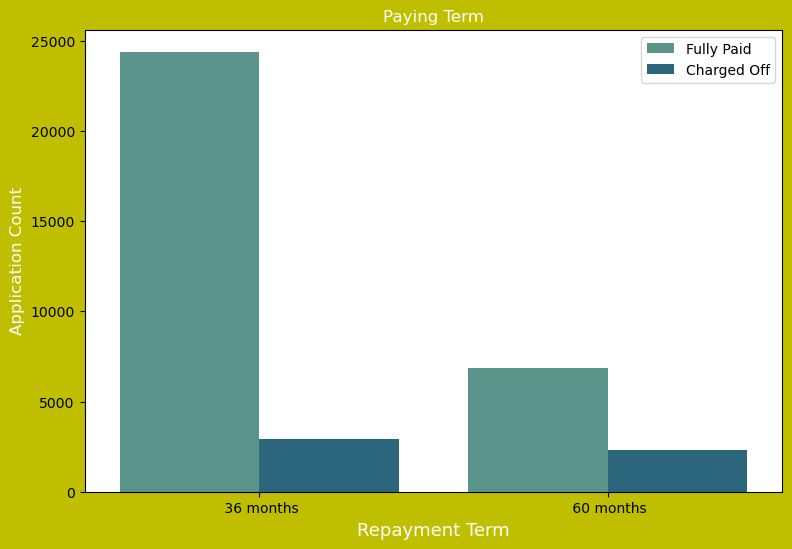

In [53]:
#loan Term
plt.figure(figsize=(9,6),facecolor='y')
ax = sns.countplot(x='term',data=loan_data,hue='loan_status',palette='crest')
ax.set_title('Paying Term',fontsize=12,color='w')
ax.set_xlabel('Repayment Term',fontsize=13,color = 'w')
ax.set_ylabel('Application Count',fontsize=12,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


#### Observation:
Most of the Loans were of the 36 months category

### Interest rate

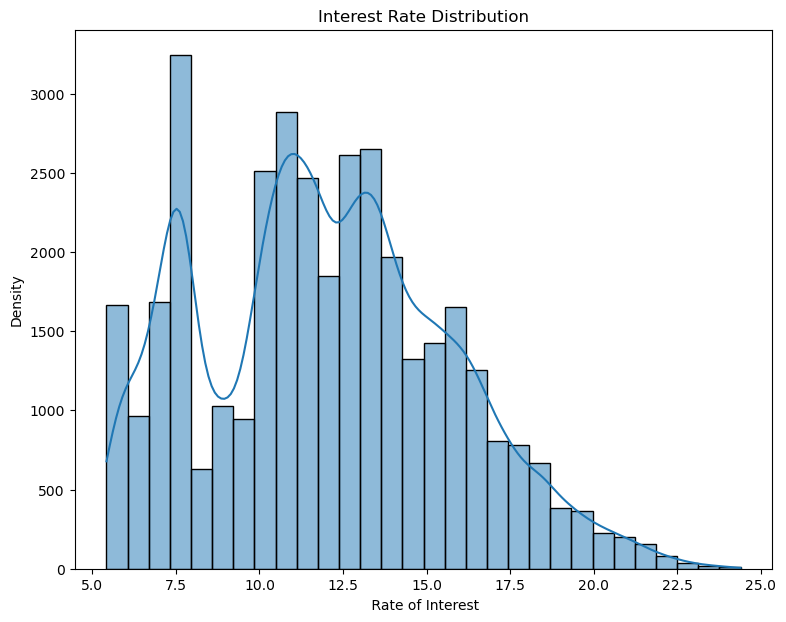

In [54]:
#interest rate
plt.figure(figsize=(9,7))
sns.histplot(sorted(loan_data.int_rate),kde=True,bins=30)
plt.title('Interest Rate Distribution')
plt.xlabel(' Rate of Interest')
plt.ylabel('Density')
plt.show()

Observation:
Interest Rate is high at 7.5 and has a sharp decline at 10 and most of the people opting for ROI falls in 10 to 14

### Grade & SubGrade:

In [55]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()


0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

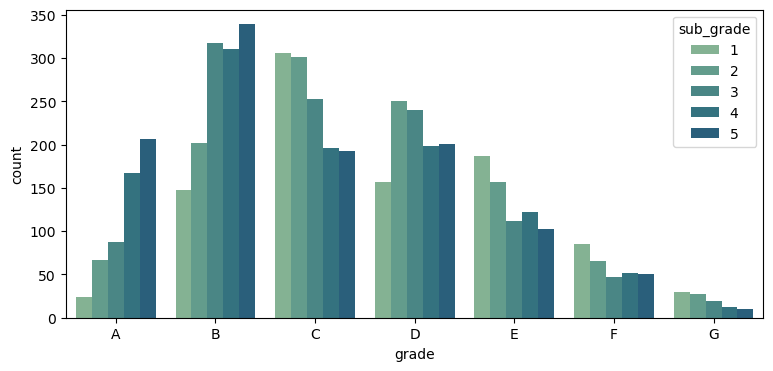

In [56]:
fig, ax = plt.subplots(figsize=(9,4))

sns.set_palette('crest')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='grade', ylabel='count'>

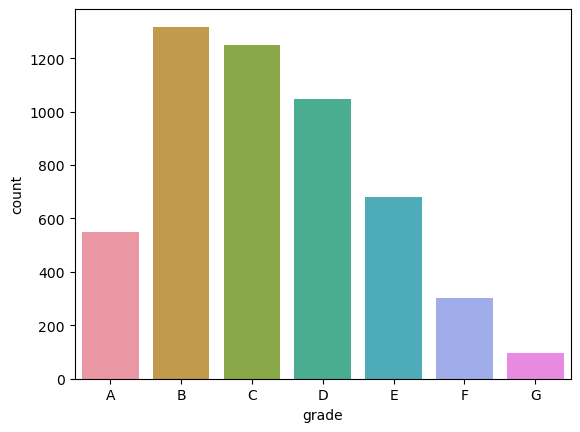

In [57]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = loan_data[loan_data.loan_status == 'Charged Off'])


observation: Most borrowers fall in the B and C categories of grades/subgrades

### Employment Length

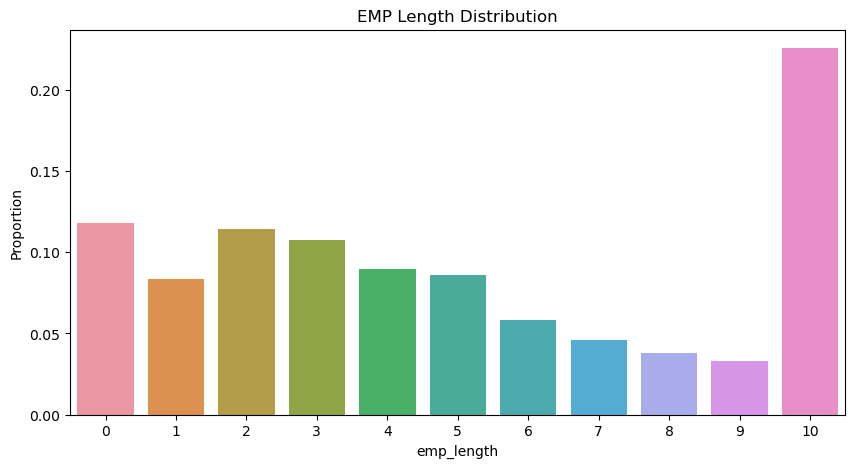

In [58]:
plt.figure(figsize=(10,5))
#Probability-Percentage 
Probability = loan_data['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='emp_length', data=Probability)
plt.title('EMP Length Distribution')
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.show()

Observations : People who take loan are more in the category of 10+ Years


### Home ownership

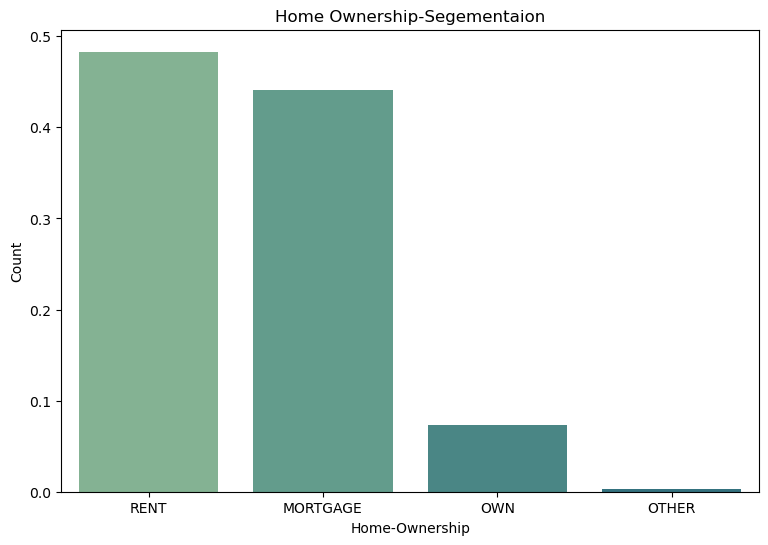

In [59]:
plt.figure(figsize=(9,6))
Probability = loan_data['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='home_ownership', data=Probability)
plt.title('Home Ownership-Segementaion',fontsize=12)
plt.xlabel('Home-Ownership')
plt.ylabel('Count')
plt.show()

Observation: Home Ownership distribution is major in the rental house segment.

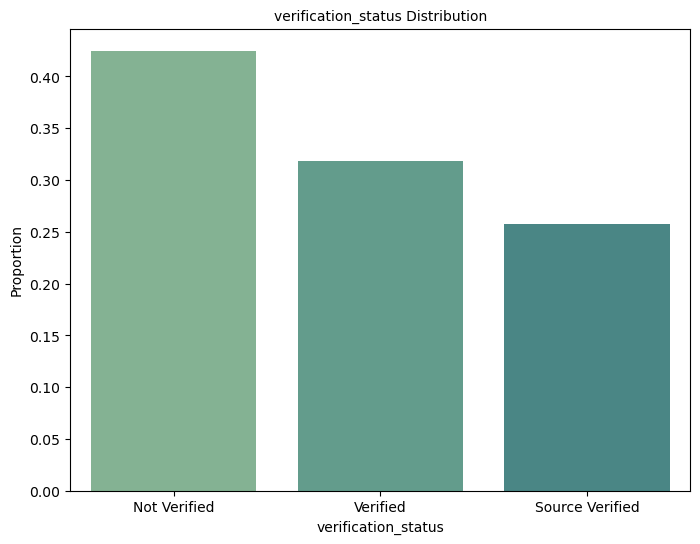

In [60]:
# Distribution of verification_status
#Probability of values
plt.figure(figsize=(8,6))
probability = loan_data['verification_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='verification_status', data=probability)
plt.title('verification_status Distribution', fontsize=10)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.show()

Observation: Most of the loans were given without a proper verification of the loan taker

### Purpose

<Axes: xlabel='count', ylabel='purpose'>

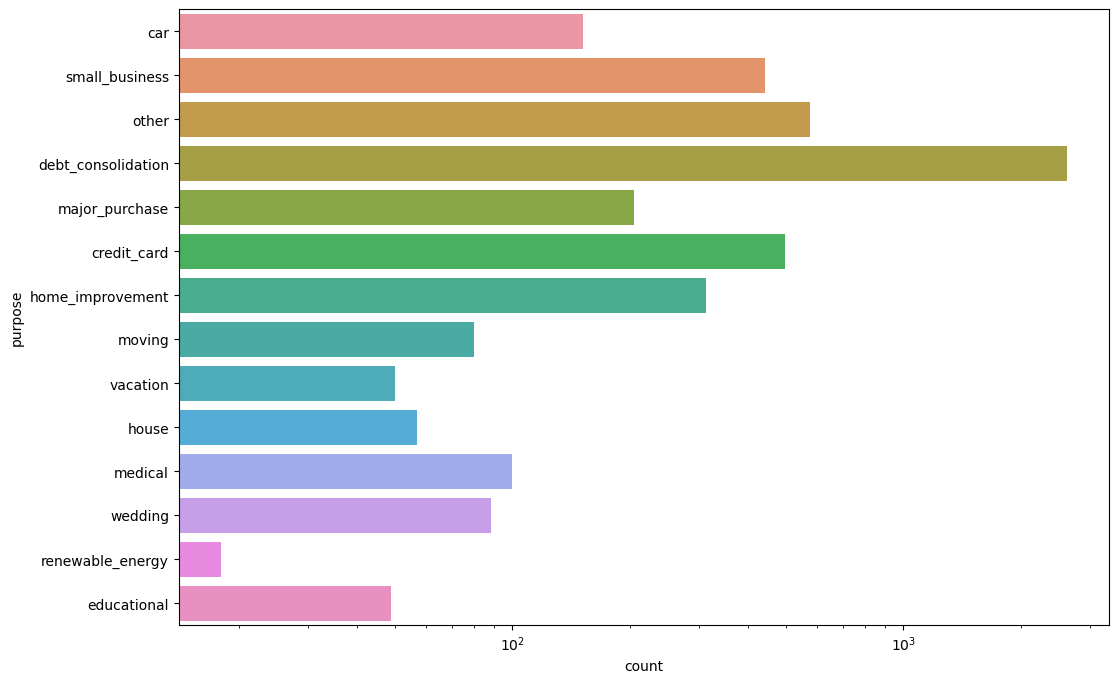

In [61]:
#Purpose : Probability check
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])


Observation: Major purpose of taking loan is debt_consolidation

### addr_state

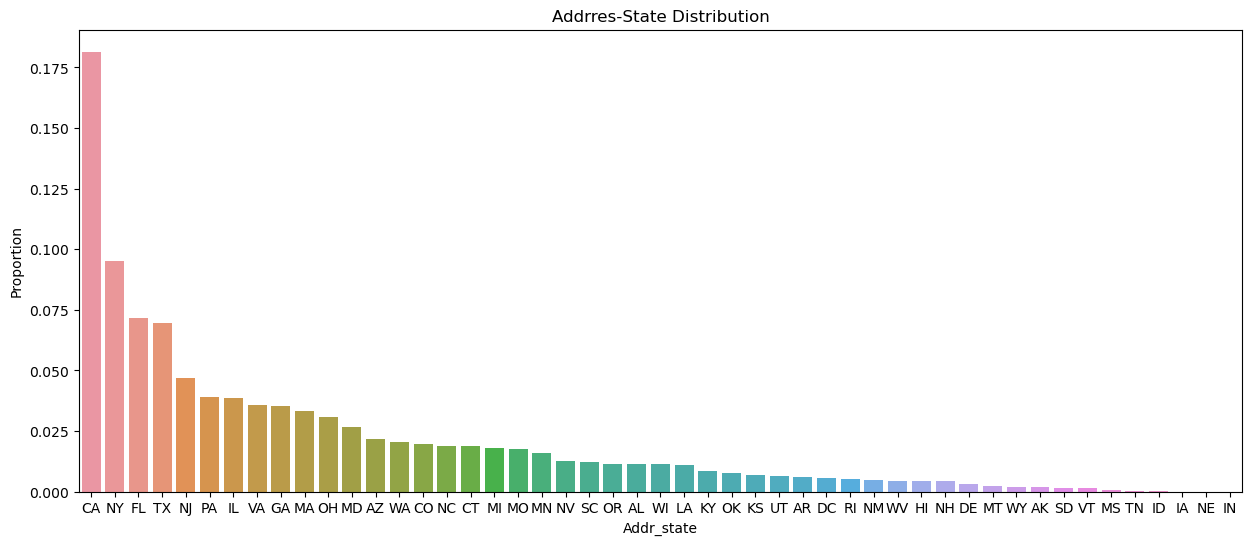

In [62]:
# Distribution of addr_state
plt.figure(figsize=(15,6))

#Probability of values
probability = loan_data['addr_state'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='addr_state',  data=probability)
plt.title('Addrres-State Distribution',fontsize=12)
plt.xlabel('Addr_state')
plt.ylabel('Proportion')
plt.show()

Observation:  The Majority of the people who opt for loans are from cities like California,New yok and Texas


####  Extraction of month and Year

In [64]:
## Ignore Warnings
import warnings
warnings.filterwarnings('ignore', '.*do not.*',)

#Extraction
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]



In [65]:
loan_data.head(1)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011


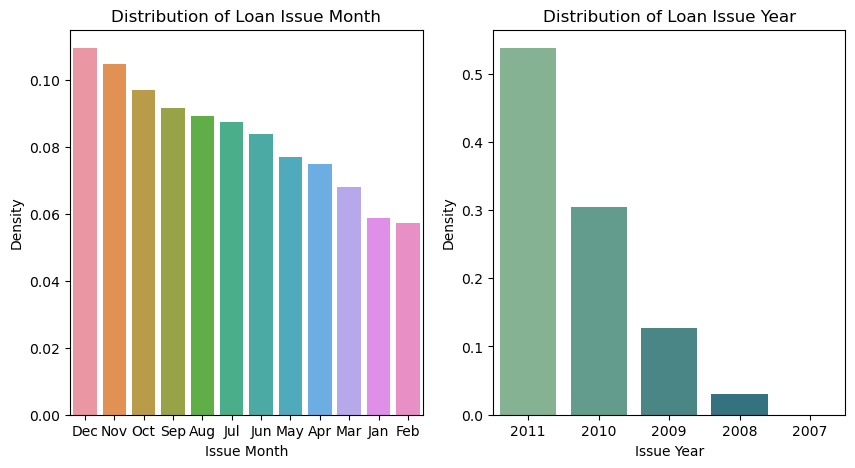

In [66]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
probability=loan_data['issue_month'].value_counts(normalize=True).reset_index()
sns.barplot(x='index',y='issue_month',data=probability)
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.xlabel('Issue Month')
plt.ylabel('Density')

#Subplot 2
plt.subplot(1,2,2)
probability=loan_data['issue_year'].value_counts(normalize=True).reset_index()
sns.barplot(x='index',y='issue_year',data=probability)
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.show()

Observation:Most of the people took loans in December and in 2011 the highest records of loans for Dec month were given the most and the loans taken by people had a huge rise in 2011 compared to the previous years

#### Segmented Univariate Analysis

- Using Loan Status W.R.T Other aspects

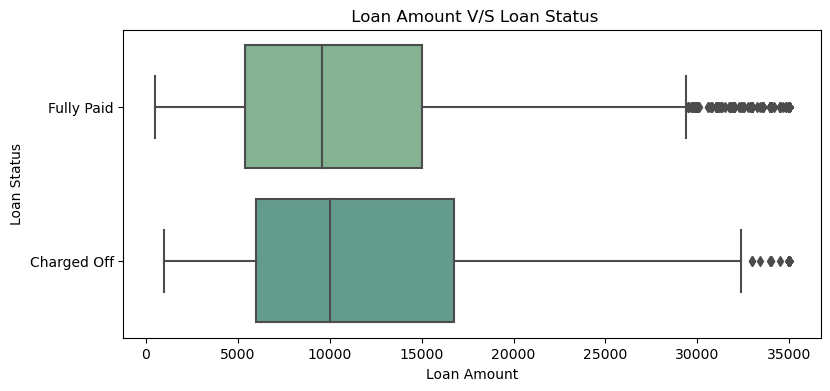

In [67]:
#Loan amount based on loan_status
plt.figure(figsize=(9,4))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.title(' Loan Amount V/S Loan Status',fontsize=12)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show()

Observation:Median and 1st quartile are almost the same but majority of the people falling in 3rd quartile which is 15k+ seems to be the largest defaulters

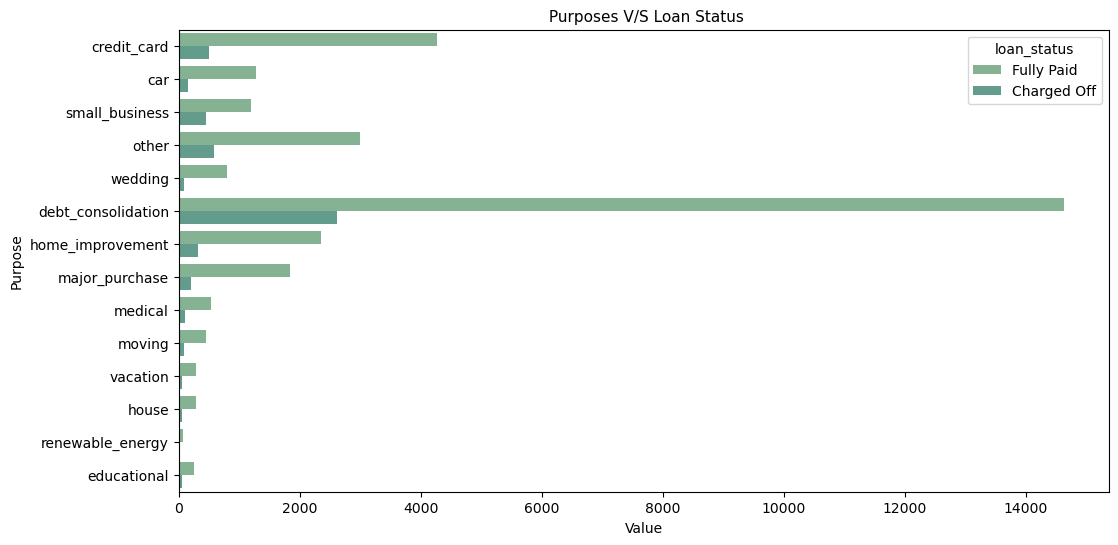

In [68]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(12,6))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.title(' Purposes V/S Loan Status',fontsize=11)
plt.xlabel('Value')
plt.ylabel('Purpose')
plt.show()

Observation:Debt consolidation stands as the major purpose for opting loan-Charged off

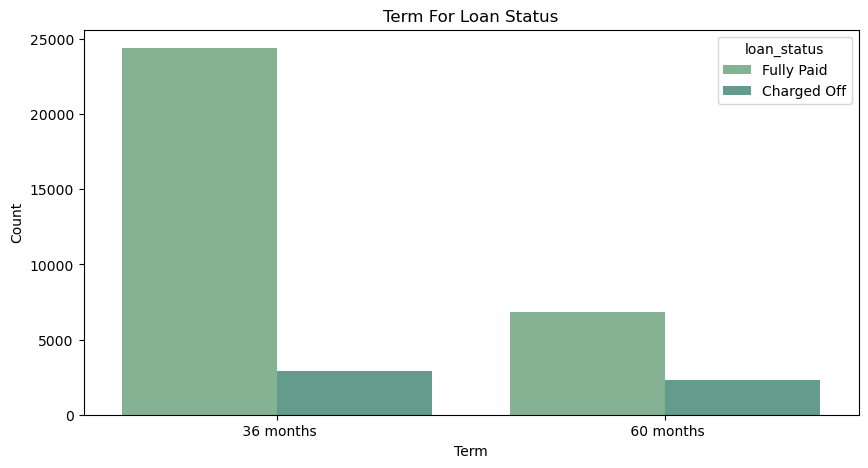

In [69]:
# Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.title('Term For Loan Status',fontsize=12)
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

Observation:36 Months Charged off percentage is high compared to 60 Months with respect to fully paid loans

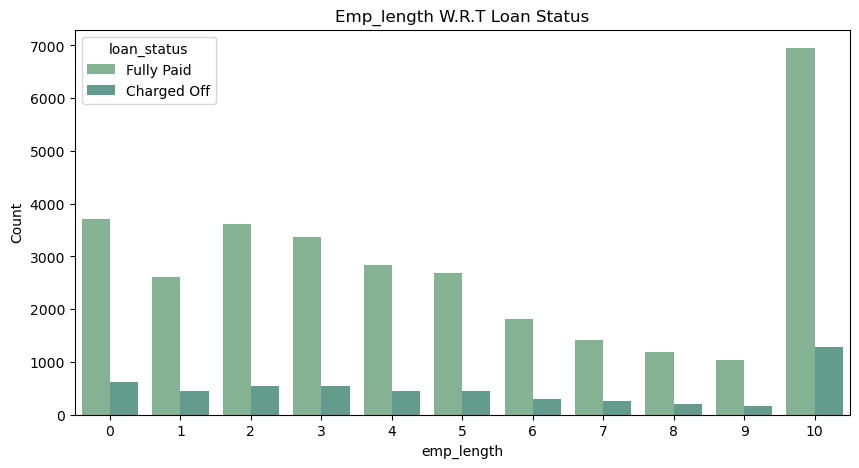

In [70]:
#emp_length on loan_status
plt.figure(figsize=(10,5))

sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.title('Emp_length W.R.T Loan Status',fontsize=12)
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.show()

Observation: Status of charged off loans seems to be higher for employees more than 10years pointing at chances of default 

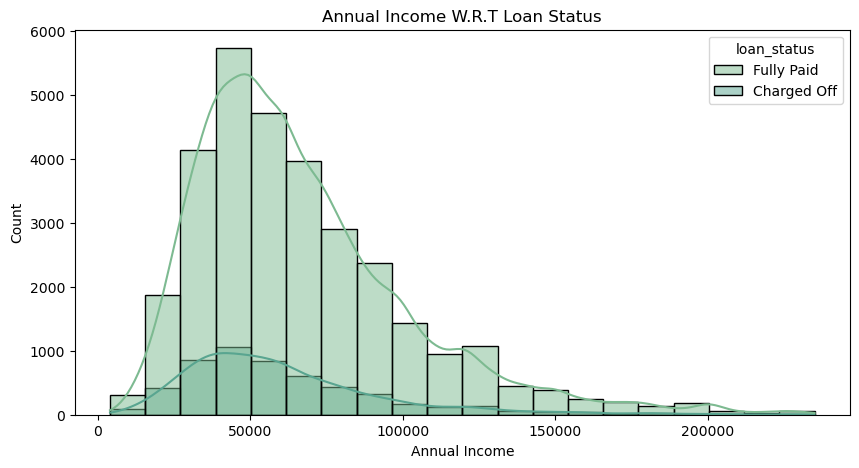

In [71]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income W.R.T Loan Status',fontsize=12)
plt.show()

Observation: Majority of the people who may defult fall in the range of 50000 to  70000

#### Term ,Grade, Interest Rate W.R.T Loan Amount

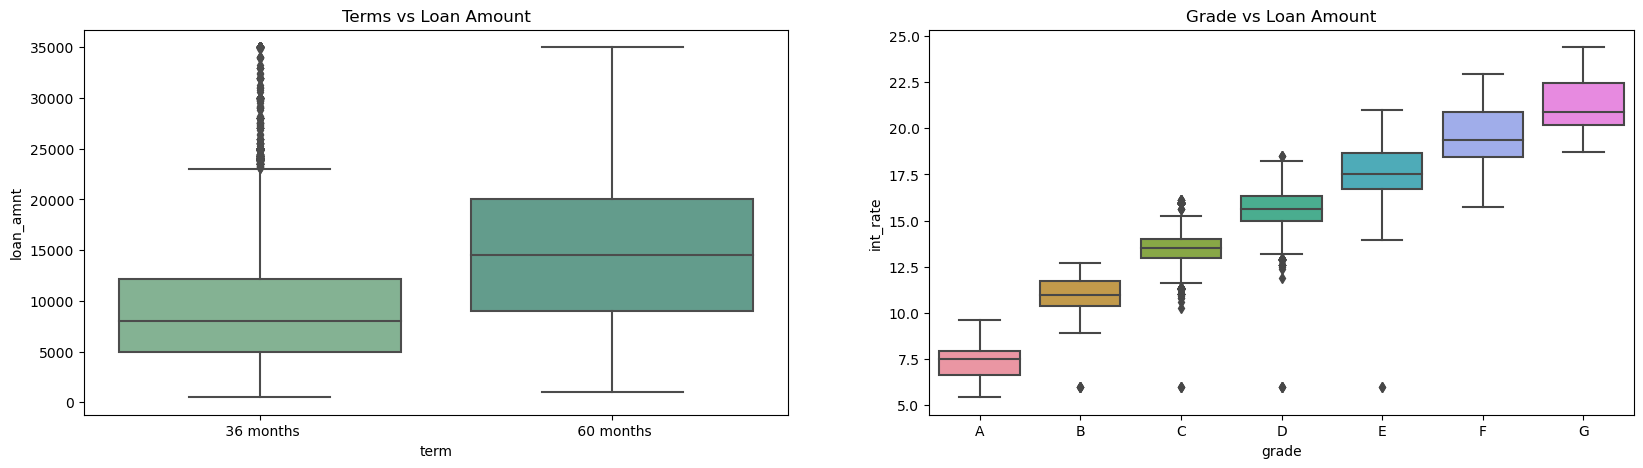

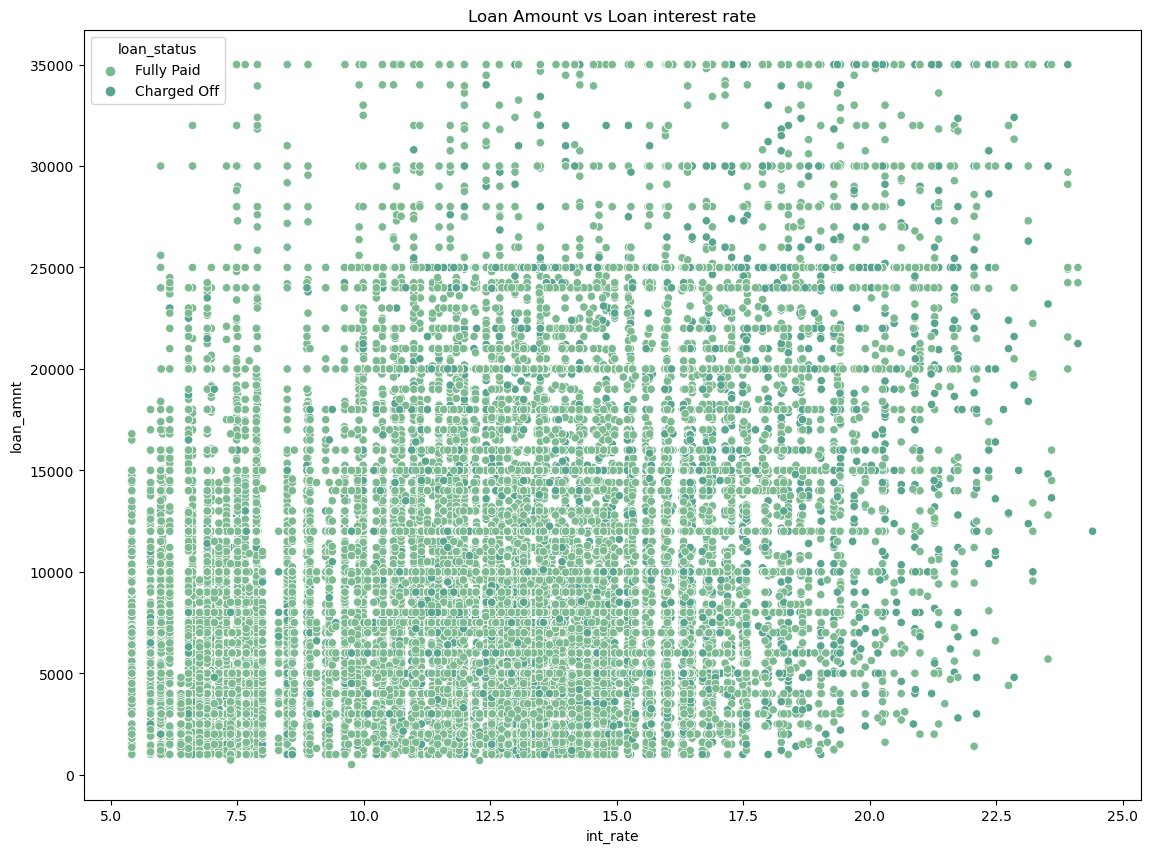

In [79]:
#Term ,Grade V/S Loan Amount
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.loan_amnt, data=loan_data)
plt.title('Terms vs Loan Amount')

#Subplot2
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.int_rate, order = grade_ord, data=loan_data)

#Subplot3:
plt.figure(figsize=(30,10))
plt.subplot(122)
#scatter plot for analysing distribution
sns.scatterplot(y='loan_amnt', x='int_rate', data=loan_data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

Observation: Plot 1: Defaulters seems to be more for 3rd quartile of 36 months and 1st qurtile of 60 months and the loan amount which can defaulted in both scenatiors falls in the range of 10k-16k
Plot 2: The higher the rate of interest the lesser the grade

#### Bivariate Analysis

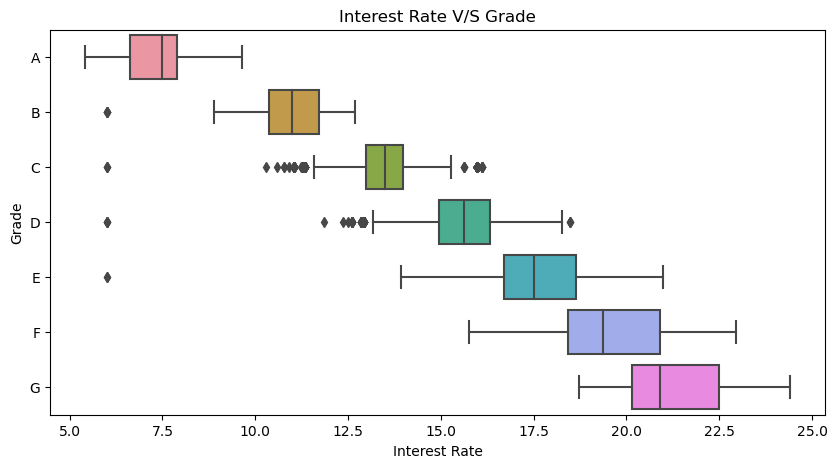

In [80]:
# Comparison of interest rate and grade
plt.figure(figsize=(10,5))
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(data=loan_data,x='int_rate',y='grade',order = grade_ord)
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Interest Rate V/S Grade',fontsize=12)
plt.show()

Observation: Interest Rate keeps increasing with decrease of grades

In [73]:
loan_data.head(1)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011


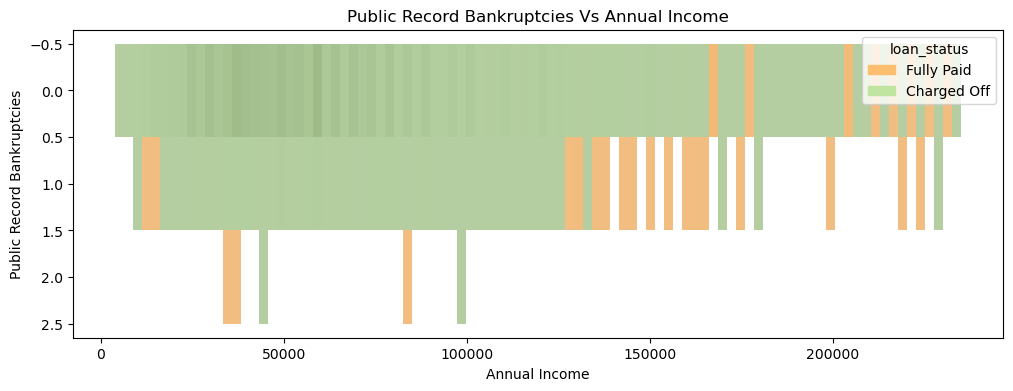

In [74]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(12,4))
sns.histplot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status, palette='Spectral')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.show()

Observation: Bankruptcies seems to be higher for charged off loan status inclining more in the income range of 10-13k

In [101]:
loan_data.head(1)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011


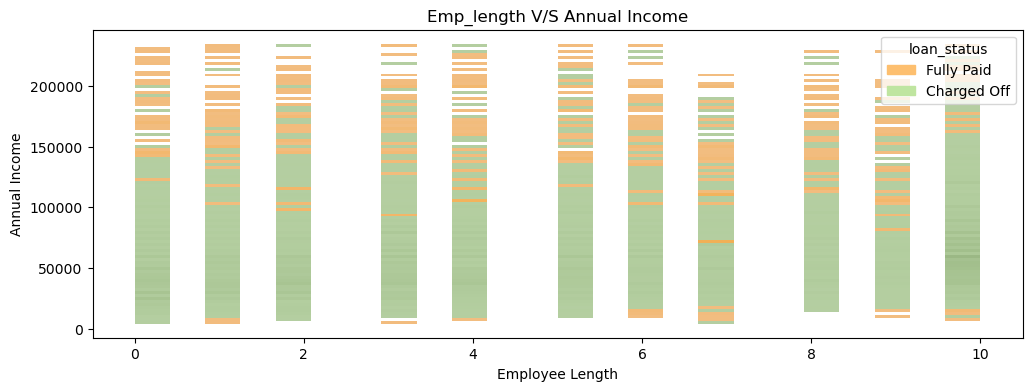

In [75]:
plt.figure(figsize=(12,4))
sns.histplot(x=loan_data.emp_length,y=loan_data.annual_inc,hue=loan_data.loan_status, palette='Spectral')
plt.title('Emp_length V/S Annual Income',fontsize=12)
plt.xlabel('Employee Length')
plt.ylabel('Annual Income')
plt.show()

Observation: There are chances of more defaulters in the 10+year range ,however when aonsidering annual income range of defaulters is more in the range of 10k to 15k irrespective of length of employement.

In [122]:
loan_data.head(1)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,5000,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011


### Issue Month V/S Annual Income

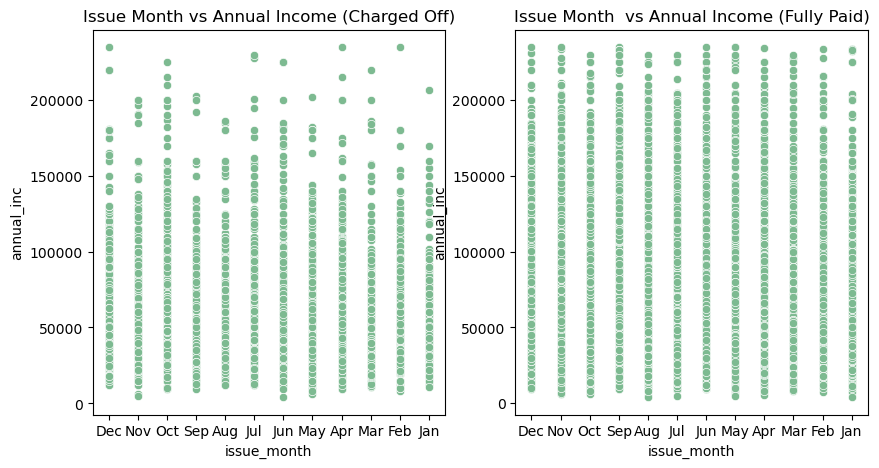

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(x='issue_month', y='annual_inc', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.title('Issue Month vs Annual Income (Charged Off)')
plt.subplot(122)
sns.scatterplot(x='issue_month', y='annual_inc', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.title('Issue Month  vs Annual Income (Fully Paid)')
plt.show()

Observation: October month with irrespective of annual income ranges indicates a large reason for defaulting
    Plot 2: Not much to figure out

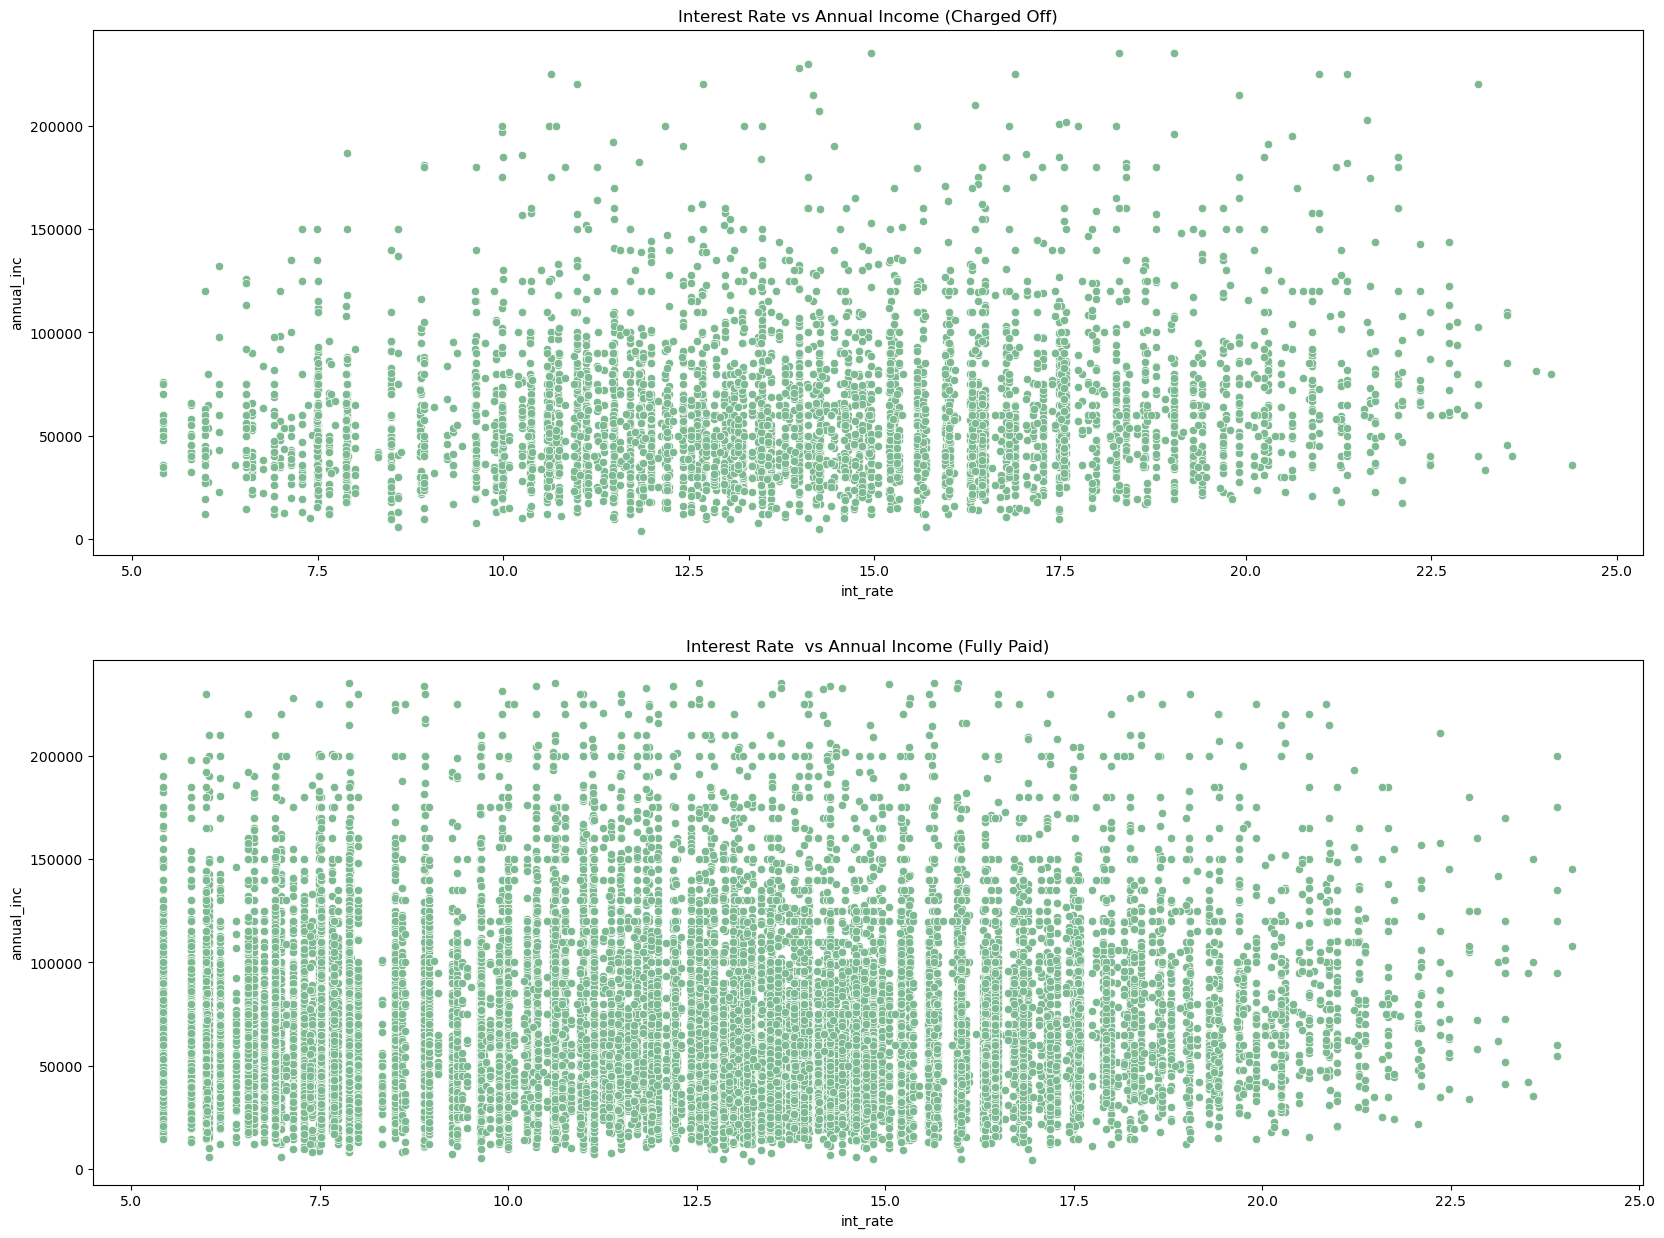

In [77]:
plt.figure(figsize=(20,15))
plt.subplot(211)
sns.scatterplot(x='int_rate', y='annual_inc', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.title('Interest Rate vs Annual Income (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='int_rate', y='annual_inc', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.title('Interest Rate  vs Annual Income (Fully Paid)')
plt.show()

Observation: From the charged off plot we can say that maximum defaulters fall in the annual income range <10k with an interest rate opted for 11 to 16 percent
 Not much info can me made from fully paid

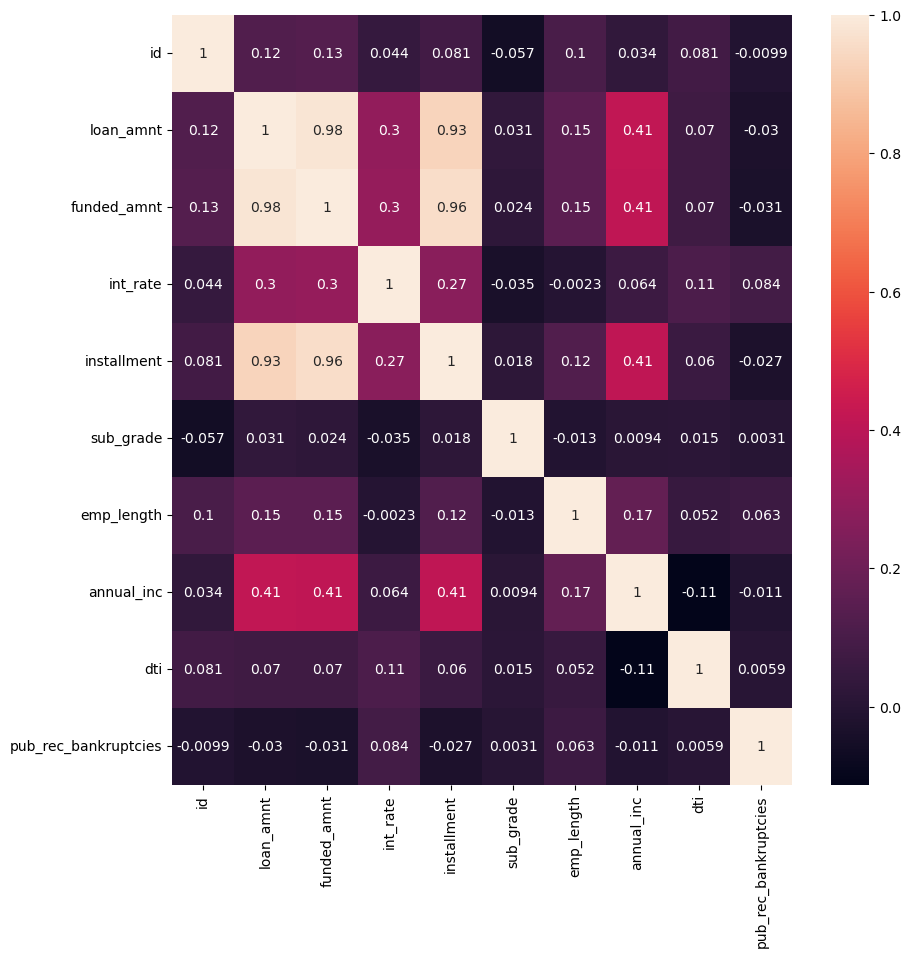

In [78]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

### Summarization of findings


	

#### Univariate Analysis


Most of the loans taken are < 10000 followed by 10k-15k followed by >15k till 36k
•	Most of the people opting for loans have low annual income
•	The majority of the loan takers have a high DTI Ratio
•	The value of Charged off loans is less compared to Fully Paid loans
•	People prefer 36 month's loan term to 60 month's loan term
•	Interest Rate is high at 7.5 and has a sharp decline at 10 and most of the people opting for ROI fall in 10 to 14
•	Most borrowers fall in the B and C categories of grades/subgrade
•	People who take loans are more in the category of 10+ Years
•	Home Ownership distribution is major in the rental house segment
•	Most of the loans were given without proper verification of the loan taker
•	The major purpose of taking a loan is debt-consolidation
•	The majority of the people who opt for loans are from cities like California, New, and Texas
•	Most of people took loans in December and in 2011 the highest records of loans for Dec month were given the most and the loans taken by people had a huge rise in 2011 compared to the previous years


#### Segmented Univariate Analysis

Loan Status with other values
•	Median and 1st quartile are almost the same but the majority of the people falling in the 3rd quartile which is 15k+ seem to be the largest defaulters
•	Debt consolidation stands as the major purpose for opting for loan-charged off
•	36 Months Charged -off percentage is high compared to 60 Months concerning fully paid loans
•	The status of charged-off loans seems to be higher for employees more than 10 years pointing at chances of default
•	Majority of the people who may default fall in the range of 50000 to 70000 w.r.t charged off loans status
Term, Grade, Interest Rate W.R.T Loan Amount
•	Defaulters seem to be more for the 3rd quartile of 36 months and 1st quartile of 60 months and the loan amount that can defaulted in both scenarios falls in the range of 10k-16k
•	The higher the rate of interest the lesser the grade


#### Bivariate Analysis:

•	Interest Rate keeps increasing with a decrease in grades
•	Bankruptcies seem to be higher for charged-off loan status inclining more in the income range of 10-13k
•	There are chances of more defaulters in the 10+year range, however when considering the annual income range defaulters are more in the range of 10k to 15k irrespective of the length of employment.
•	October month with irrespective of annual income ranges indicates a large reason for defaulting
•	From the charged-off plot we can say that maximum defaulters fall in the annual income range <10k with an interest rate opted for 11 to 16 percent Not much info can be made from fully paid
